In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

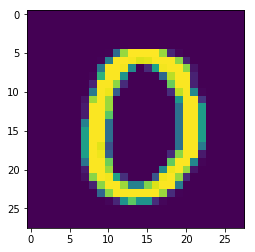

In [19]:
plt.imshow(mnist.train.images[10].reshape((28, 28)))

In [38]:
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)
y_ = tf.placeholder(tf.float32, [None, 10])

In [39]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(tf.log(y) * y_, reduction_indices=[1]))

In [40]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [41]:
sess = tf.InteractiveSession()

In [47]:
tf.global_variables_initializer().run()

In [50]:
accuracies = []
for _ in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
  correct = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
  accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
  accuracies.append(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

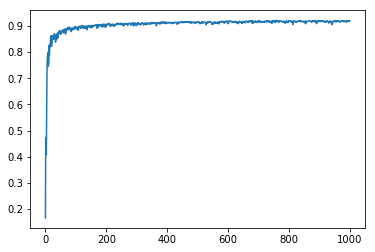

In [51]:
plt.plot(accuracies)